Dog Breed Classification

In [1]:
# import neccessary libraries 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image 
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Reshape

In [2]:
# creating project paths
project_path = './dog-breed-identification/'
train_folder_path = project_path + 'train/'
test_folder_path = project_path + 'test/'

In [3]:
# Reading the labels csv
train_df = pd.read_csv(project_path + 'labels.csv')

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10222 non-null  object
 1   breed   10222 non-null  object
dtypes: object(2)
memory usage: 159.8+ KB


In [5]:
# first 5 rows
train_df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [6]:
# let's describe our dataset to explore more about the same.
train_df.describe().T

,count,unique,top,freq
id,10222,10222,9c255970bc0a106ad9b031c1a5cf97d1,1
breed,10222,120,scottish_deerhound,126


In [7]:
# Adding the image path to the dataframe
train_df['image_path'] = train_df.id.apply(lambda x: (train_folder_path + '{}.jpg'.format(x)))

In [8]:
train_df.sample(5)

,id,breed,image_path
7617,becbfec66b1e2d7c5ac05cd9d9682931,pug,./dog-breed-identification/train/becbfec66b1e2...
719,11b60d8d86f14a601ca290909a17cbc6,affenpinscher,./dog-breed-identification/train/11b60d8d86f14...
5274,84d2dd9eff021b6095a4b1e2ba3c1c0c,tibetan_terrier,./dog-breed-identification/train/84d2dd9eff021...
1125,1c0d38d23888da863dbb28b5db1cc4af,sealyham_terrier,./dog-breed-identification/train/1c0d38d23888d...
5176,82e5e207ea4080bb7bb1cf0371dd38eb,cardigan,./dog-breed-identification/train/82e5e207ea408...


In [9]:
# plt.figure(figsize=(10,20))
# sns.barplot(y=train_df['breed'].value_counts().index, x=train_df['breed'].value_counts(), orient='h')

In [10]:
# function to visualize the random image
def show_image_grid(image_size, figure_size, images_per_row):
    """
    This function lets you see the sample images from the training dataset.
    image_size: resize image dimension.
    figure_size: represent the dimension of figure.
    images_per_row: number of images per row.
    """
    plt.figure(figsize=(figure_size,figure_size))
    for n in range(images_per_row*images_per_row):
        ax = plt.subplot(images_per_row, images_per_row, n+1)
        img_num =  np.random.randint(0, train_df.shape[0])
        
        image = Image.open(train_df.loc[img_num,'image_path'])
        plt.title(train_df.loc[img_num,'breed'])
        plt.imshow(np.asarray(image.resize((image_size,image_size), Image.ANTIALIAS)))
        plt.axis('off')

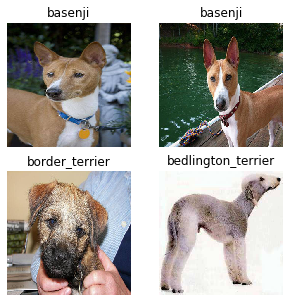

In [12]:
show_image_grid(300, 5, 2)

In [13]:
image_size = 300

In [14]:
training_fetaures = []
training_labels = []

In [15]:
for index, row in (train_df.iterrows()):
    train_image =  Image.open(row['image_path'])
    train_image_resize = Image.open(row['image_path']).resize((image_size,image_size), Image.ANTIALIAS)
    training_fetaures.append(np.asarray(train_image_resize, np.float32)/255)
    training_labels.append(row.breed)

In [17]:
"Length of training_features", len(training_fetaures)

('Length of training_features', 10222)

In [ ]:
training_fetaures = np.asarray(training_fetaures, np.float32)

In [ ]:
training_labels =  np.asarray(training_labels, np.float32)

In [22]:
train, test = train_test_split(train_df, test_size=0.2, random_state=2, stratify=train_df['breed'])

In [24]:
def create_data(df):
    for index, row in (df.iterrows()):
        train_image =  Image.open(row['image_path'])
        train_image_resize = Image.open(row['image_path']).resize((image_size,image_size), Image.ANTIALIAS)
        training_fetaures.append(np.asarray(train_image_resize, np.float32)/255)
        training_labels.append(row.breed)

scottish_deerhound      101
maltese_dog              93
afghan_hound             93
entlebucher              92
bernese_mountain_dog     91
Name: breed, dtype: int64

In [25]:
test.breed.value_counts()[:5]

scottish_deerhound      25
maltese_dog             24
afghan_hound            23
bernese_mountain_dog    23
shih-tzu                23
Name: breed, dtype: int64

In [ ]:
x_train1 = np.array(x_train,np.float32)
# x_train = (np.array(x_train, np.float32) /255)

In [ ]:
len(x_train)

In [ ]:
x_train1.shape

In [ ]:
def read_and_prep_images(img_paths, img_height=image_size, img_width=image_size):
    imgs = [load_img(img_path, target_size=(img_height, img_width)) for img_path in img_paths]
    img_array = np.array([img_to_array(img) for img in imgs])
    output = preprocess_input(img_array)
    return(output)

In [ ]:
read_and_prep_images(train_df['image_path'])

In [ ]:
train.shape

In [ ]:
test.shape